In [323]:
# Importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

# Ignoramos warnings
import warnings
warnings.filterwarnings('ignore')

In [324]:
# Importamos datos
path = 'C:/Users/Roberto/Downloads/archive (3)/DataCars.csv'
data = pd.read_csv(path)
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Limpieza del dataframe

- Creamos un sub-dataframe con las variables de interes

In [325]:
# Creamos un subdataframe con las variables de interes
columnas = ['Car_Name','Year','Selling_Price','Kms_Driven','Fuel_Type','Transmission']
subdata = data[columnas]
subdata.rename(columns = {'Car_Name':'Vehiculo',
                                    'Year':'Año',
                                    'Selling_Price':'Precio',
                                    'Kms_Driven':'Kilometrage',
                                    'Fuel_Type':'Combustible',
                                    'Transmission':'Transmision'}, inplace=True)

subdata.head()

,Vehiculo,Año,Precio,Kilometrage,Combustible,Transmision
0,ritz,2014,3.35,27000,Petrol,Manual
1,sx4,2013,4.75,43000,Diesel,Manual
2,ciaz,2017,7.25,6900,Petrol,Manual
3,wagon r,2011,2.85,5200,Petrol,Manual
4,swift,2014,4.60,42450,Diesel,Manual


In [326]:
# Vemos las dimensiones del dataframe
subdata.shape

(301, 6)

In [327]:
# Vemos si hay nulos
subdata.isnull().sum()

Vehiculo       0
Año            0
Precio         0
Kilometrage    0
Combustible    0
Transmision    0
dtype: int64

In [328]:
# Vemos si hay duplicados
subdata.duplicated().sum()

2

In [329]:
# Vemos que hay dos duplicados, por lo tanto dropeamos dichos valores:
subdata.drop_duplicates(inplace=True)
subdata.duplicated().sum()

0

In [330]:
# Cuando dropeas valores se hacen huecos en los indices y despues es un pedo al iterar sobre el data frame
# Para arreglar esto hacemos:
subdata = subdata.reset_index(drop=True)
len(subdata)

299

In [331]:
# Veamos cuantos tipos de vehiculos hay
subdata.Vehiculo.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [332]:
# Vemos que son un webo, exactamente:
len(subdata.Vehiculo.unique()) # 98 vehiculos...

98

## Análisis Exploratorio

### Variables Categoricas

In [219]:
# Veamos cual es el vehiculo mas comun y el menos comun:
numero_de_vehiculos = subdata['Vehiculo'].value_counts()
numero_de_vehiculos

city                        26
corolla altis               16
verna                       14
brio                        10
fortuner                    10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Vehiculo, Length: 98, dtype: int64

**Observaciones**
- El vehículo más comun es el city.

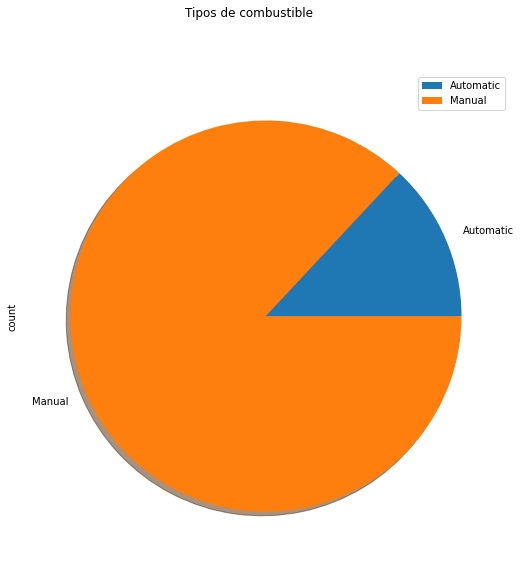

In [307]:
# Hagamos el estudio de frecuencias para las variables Transmision y Combustible
tabla1 = pd.crosstab(index=subdata['Transmision'], columns='count')
plot = tabla1.plot(kind='pie',figsize=(19,9), subplots=True, title='Tipos de combustible', shadow=True)
#plt.show()

**Observaciones**
- El tipo de combustible más común es la gasolina normal.

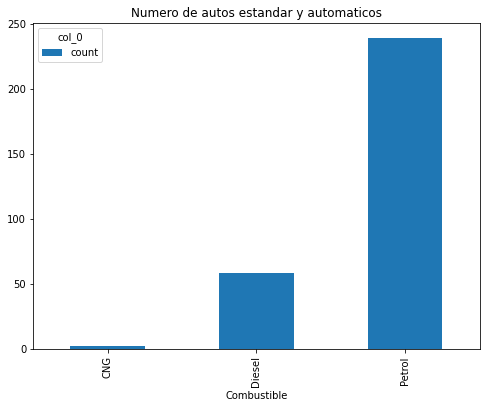

In [255]:
# Estudio de frecuencias de la variable transmision
# Estudiemos la variable tipo de combustible
tabla = pd.crosstab(index=subdata['Combustible'], columns='count')
tabla.plot(kind='bar', figsize=(8,6), title='Numero de autos estandar y automaticos')
plt.show()

**Observaciones**

- Vemos que hay mas vehiculos estandarn que automaticos en esta muestra de datos.

#### ¿Habrá relación entre el tipo de transmision y el tipo de combustible que consume un auto?

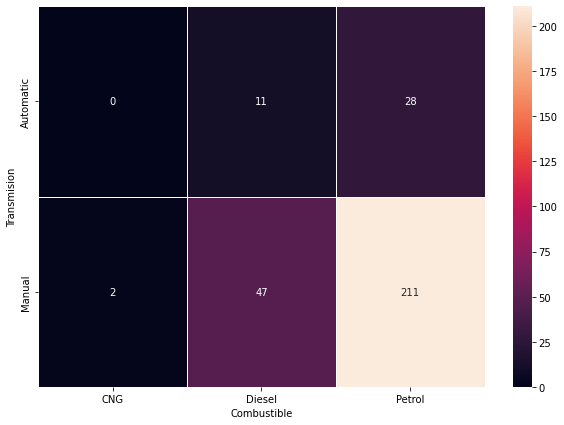

In [296]:
# Para responder la pregunta anterior hacemos un estudio de fercuencias conjuntas
tabla = pd.crosstab(subdata['Transmision'],subdata['Combustible'])
plt.figure(figsize=(10,7))
sb.heatmap(tabla, annot=True, fmt='d',linewidth=1)
plt.show()

**Observaciones**
- La mayoría de los vehículos son estandar que usan gasolina común
- Casi ningún vehiculo utiliza CNG.

### Variables numéricas

In [72]:
# hagamos un describe para hacernos una idea general de los datos numericos
subdata.describe()

,Año,Precio,Kilometrage
count,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,36947.205980
std,2.891554,5.082812,38886.883882
min,2003.000000,0.100000,500.000000
25%,2012.000000,0.900000,15000.000000
50%,2014.000000,3.600000,32000.000000
75%,2016.000000,6.000000,48767.000000
max,2018.000000,35.000000,500000.000000


**Observaciones**
- En promedio un vehículo cuesta 4,661 dlls. El más barato cuesta 100 dlls y el más caro 35,000 dlls
- El 50% de los vehículos son modelos entre 2012 y 2016, el más viejo es del año 2003 y el más nuevo del 2018.
- La media de kilometrage es de 36,947 km, el menos corrido tiene 500 km y el mas carreteado medio millon de kms

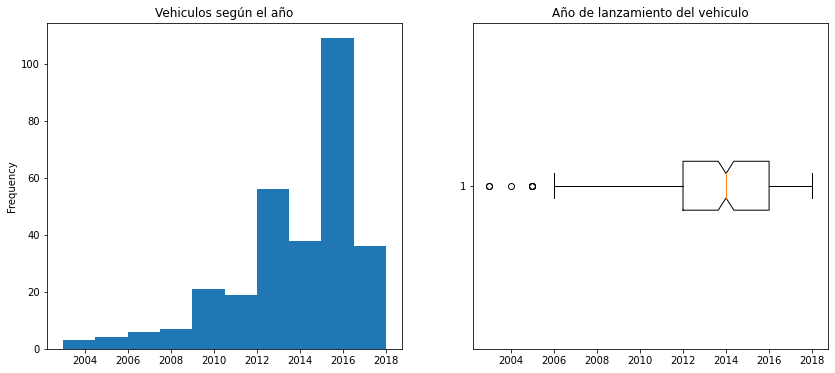

In [213]:
# Estudiemos la disribución y dispersion de la variable Año
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
subdata.Año.plot(kind='hist', title='Vehiculos según el año')
plt.subplot(1,2,2)
plt.boxplot(subdata['Año'], vert=0, notch=True)
plt.title('Año de lanzamiento del vehiculo')
plt.show()

**Observaciones**
- La mayoria de los autos son modelos 2009 en adelante.
- Los autos viejos son poco comunes, vemos 3 outliers para modelos de auto anteriores al 2006. Esto hace sentido puesto que en Estados Unidos las reglas son mas estrictas que en México y los autos viejos son exportados a otros paises.


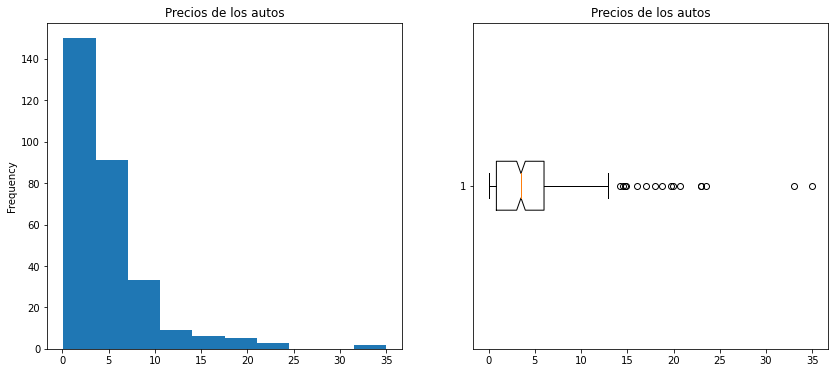

In [214]:
# Hagamos el mismo analisis para la variable Precio
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
subdata['Precio'].plot(kind='hist', title='Precios de los autos')
plt.subplot(1,2,2)
plt.boxplot(subdata['Precio'], vert=0, notch=True)
plt.title('Precios de los autos')
plt.show()

**Observaciones**

- La mayoria de los vehiculos tienen precios menores o iguales a 10 mil dolares.


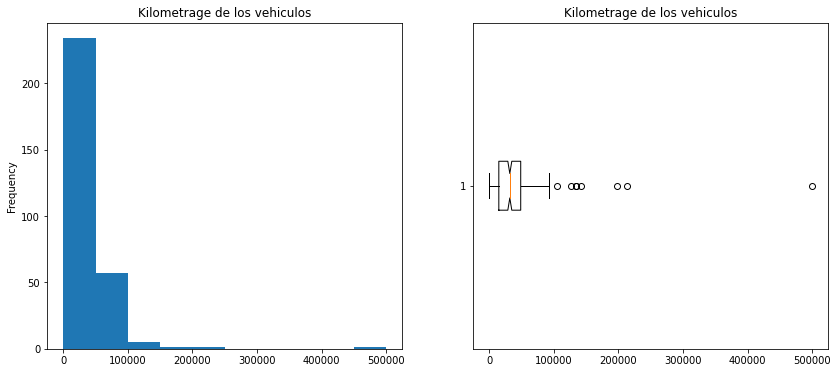

In [215]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
subdata['Kilometrage'].plot(kind='hist', title='Kilometrage de los vehiculos')
plt.subplot(1,2,2)
plt.boxplot(subdata['Kilometrage'], vert=0, notch=True)
plt.title('Kilometrage de los vehiculos')
plt.show()

**Observaciones**
- La mayoria de los autos tienen un kilometrage menor a los 100 mil kilometros.

### Analisis mixto

In [313]:
vehiculos = subdata.groupby('Vehiculo')
city = vehiculos.get_group('city')
city

,Vehiculo,Año,Precio,Kilometrage,Combustible,Transmision
249,city,2013,5.00,56701,Petrol,Manual
251,city,2014,7.20,48000,Diesel,Manual
252,city,2013,5.25,54242,Petrol,Manual
254,city,2016,10.25,49562,Petrol,Manual
255,city,2015,8.50,40324,Petrol,Manual
256,city,2015,8.40,25000,Petrol,Manual
258,city,2016,9.15,29223,Petrol,Manual
265,city,2016,8.35,19434,Diesel,Manual
267,city,2015,6.70,18828,Petrol,Manual
268,city,2011,4.10,69341,Petrol,Manual


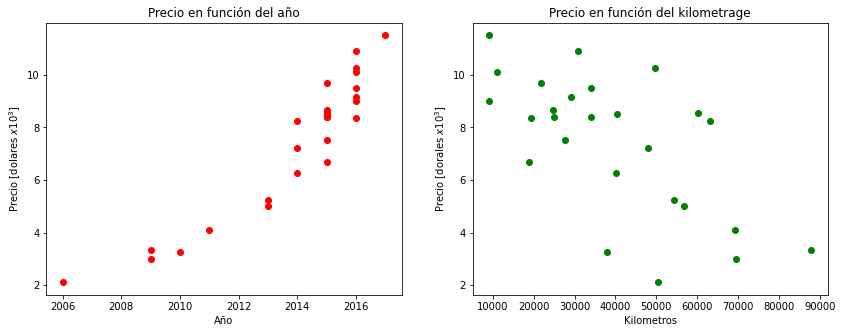

In [346]:
# Veamos la relación entre las variables Año y Kilometrage vs Precio:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(city['Año'],city['Precio'],  c='r')
plt.title('Precio en función del año')
plt.xlabel('Año')
plt.ylabel('Precio [dolares $x 10^3$]')

plt.subplot(1,2,2)
plt.scatter(city['Kilometrage'],city['Precio'], c='g')
plt.title('Precio en función del kilometrage')
plt.xlabel('Kilometros')
plt.ylabel('Precio [dorales $x 10^3$]')
plt.show()

**Observaciones**

- En la grafica de la izquierda vemos que la tendencia es no lineal y a la alza. (mientras más nuevo el carro más caro costará).
- En la de la derecha notamos una tendencia negativa y muy dispersa entre las variables **Precio** y **Kilometrage** (a mayor kilometrage, menor costo)

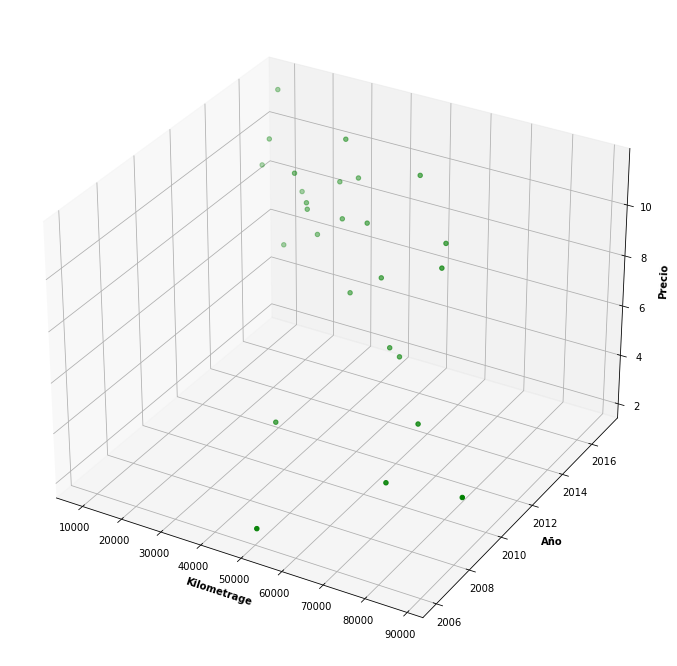

In [342]:
# Haciendo un scatterplot 3D con las 3 variables anteriores:
x = city['Kilometrage'] ; y = city['Año'] ; z = city['Precio']


# Creating figure
fig = plt.figure(figsize = (19, 12))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x, y, z, color = "green")

ax.set_xlabel('Kilometrage', fontweight ='bold')
ax.set_ylabel('Año', fontweight ='bold')
ax.set_zlabel('Precio', fontweight ='bold')

# show plot
plt.show()

**Observaciones**
- Vemos que la mayoria de los city's son autos de modelo reciente, con poco kilometrage y caros.

## Conclusiones del analisis exploratorio

- **1.** Los vehículos "city", "corolla altis", "verna" y "brio" son los más comúnes                        
- **2.** Los vehiculos estandar de petroleo son los más comunes
- **3.** La mayoria de los autos son modelo 2009 en adelante
- **4.** La mayoría de los autos tienen un kilometrage menor a 100 mil km's y en media ~ 37,000 km's
- **5.** La mayoría de los autos cuestan menos de 10 mil dolares
- **6.** Mientras mas nuevo el carro y menor kilometrage tenga, mas caro será

# Elección del auto ideal
El cliente va elegir su vehículo en función de sus gustos, estos gustos serviran para filtrar del dataframe aquellos vehiculos que cuenten con las caracteristicas y posibilidades financieras del cliente. Para el filtrado usamos las siguientes variables:
- Vehículo
- Año
- Combustible
- Transmision
- Kilometrage
- Precio

Al final del filtrado se tendra un subconjunto de vehiculos. El vehiculo que más se aproxime a los gustos y necesidades del cliente será el ideal.

In [347]:
# Utilicemos el analisis explatorio para elejir un carro de los más comunes y tener así mayor variedad de opciones

# El auto mas común es el city
vehiculo = subdata['Vehiculo'] == 'city'

# La mayoria de los autos son modelos > 2009
modelo = subdata['Año'] > 2009

# La mayoria de los autos utilizan petroleo
combustible = subdata['Combustible'] == 'Petrol'

# La mayoria de los autos son estandar
manejabilidad = subdata['Transmision'] == 'Manual'

# La media del kilometrage de la muestra es ~37 mil
kilometrage = subdata['Kilometrage'] < 37000

# El cliente cuenta solo con 7,500 dolares
precio = subdata['Precio'] <= 7.5

Por ultimo el cliente va ofrecer una cantidad, y del subconjunto filtrado por las categorias anteriores tomamos el valor mas proximo a la cantidad que ofreció el cliente, esto es:


In [350]:
# Subconjunto de autos que cumplen con las caracteristicas:
Posibles_autos = subdata[ vehiculo  & modelo  & combustible  & manejabilidad  & kilometrage   & precio ]
Posibles_autos

,Vehiculo,Año,Precio,Kilometrage,Combustible,Transmision
267,city,2015,6.7,18828,Petrol,Manual
270,city,2015,7.5,27600,Petrol,Manual


Aparentemente el auto mas convniente es el que tiene el identificador 267 puesto que tiene el menor kilometrage y es mas barato.